## Prentice's Portion ------------------------------------------------------------------------------------------------
###### https://www.kaggle.com/datasets/faa/wildlife-strikes

###### From FAA: https://wildlife.faa.gov/search
###### From FAA: https://wildlife.faa.gov/assets/fieldlist.pdf

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
typeSpecification = {"Aircraft Model": str, "Engine Model": str, "Engine3 Position": str, "Engine1 Position":str} 
animal_df = pd.read_csv('bird.csv', dtype=typeSpecification)

In [4]:
animal_df.columns

Index(['Record ID', 'Incident Year', 'Incident Month', 'Incident Day',
       'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make',
       'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model',
       'Engines', 'Engine Type', 'Engine1 Position', 'Engine2 Position',
       'Engine3 Position', 'Engine4 Position', 'Airport ID', 'Airport',
       'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility',
       'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID',
       'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities',
       'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Win

In [5]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)

In [6]:
animal_df.shape

(174104, 66)

In [8]:
animal_df.head(50)

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,4.0,34.0,40,2.0,D,1,1.0,NaN,NaN,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,ASO,NaN,CLIMB,NaN,NaN,NaN,NaN,NaN,NE1,GULL,1,NaN,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,4.0,34.0,10,2.0,D,5,5.0,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,TAKEOFF RUN,NaN,NaN,0.0,NaN,0.0,ZZ201,HOUSE SPARROW,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,NaN,NaN,NaN,NaN,NaN,0.0,R1101,BARN OWL,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,3.0,22.0,NaN,2.0,D,NaN,NaN,NaN,NaN,KMYR,MYRTLE BEACH INTL,SC,ASO,NaN,APPROACH,DAY,NaN,200.0,138.0,NaN,UNKBM,UNKNOWN MEDIUM BIRD,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KJAX,JACKSONVILLE INTL,FL,ASO,NaN,CLIMB,DAY,NaN,100.0,200.0,NaN,ZX,FINCH,1,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,129734,1990,1,4,HAL,HAWAIIAN AIR,DC-9,A,583,90,4.0,34.0,10,2.0,D,5,5.0,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,LANDING ROLL,NaN,NaN,0.0,NaN,0.0,ZY1,MUNIAS,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,129735,1990,1,5,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N5122,PACIFIC GOLDEN-PLOVER,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,129736,1990,1,5,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,NaN,NaN,NaN,NaN,NaN,0.0,ZY1,MUNIAS,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,129737,1990,1,6,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,NaN,NaN,NaN,NaN,NaN,0.0,ZY1,MUNIAS,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,127848,1990,1,7,EME,METRO EXPRESS,DHC8 DASH 8,A,303,10,3.0,31.0,10,2.0,C,4,4.0,NaN,NaN,ZZZZ,UNKNOWN,NaN,NaN,NaN,EN ROUTE,NaN,NaN,NaN,NaN,NaN,UNKBM,UNKNOWN MEDIUM BIRD,1,NaN,NaN,NaN,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
pd.isna(animal_df).sum()

Record ID                    0
Incident Year                0
Incident Month               0
Incident Day                 0
Operator ID                  0
Operator                     0
Aircraft                     0
Aircraft Type            41030
Aircraft Make            43053
Aircraft Model           51665
Aircraft Mass            46784
Engine Make              50670
Engine Model             52116
Engines                  46762
Engine Type              46822
Engine1 Position         47911
Engine2 Position         55389
Engine3 Position        162445
Engine4 Position        171012
Airport ID                   0
Airport                    290
State                    21976
FAA Region               18902
Warning Issued           97686
Flight Phase             55302
Visibility               64171
Precipitation            85782
Height                   70427
Speed                   102846
Distance                 74391
Species ID                   0
Species Name                80
Species 

### Drop Columns

In [10]:
df_modified = animal_df.drop(['Record ID', 'Aircraft Type','Engine Type','Engine1 Position','Engine2 Position','Engine3 Position',
                         'Engine4 Position', 'FAA Region', 'Warning Issued',
                       'Species Quantity', 'Flight Impact', 'Fatalities'], axis = 1)

In [11]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 54 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Incident Year         174104 non-null  int64  
 1   Incident Month        174104 non-null  int64  
 2   Incident Day          174104 non-null  int64  
 3   Operator ID           174104 non-null  object 
 4   Operator              174104 non-null  object 
 5   Aircraft              174104 non-null  object 
 6   Aircraft Make         131051 non-null  object 
 7   Aircraft Model        122439 non-null  object 
 8   Aircraft Mass         127320 non-null  float64
 9   Engine Make           123434 non-null  float64
 10  Engine Model          121988 non-null  object 
 11  Engines               127342 non-null  float64
 12  Airport ID            174104 non-null  object 
 13  Airport               173814 non-null  object 
 14  State                 152128 non-null  object 
 15  

### Replace Various Column Na's with values

#### Replace Injury Na's with 0's

In [12]:
df_modified['Injuries'].fillna(0, inplace=True)

In [14]:
df_modified.head(5)

,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Airport ID,Airport,State,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,1990,1,1,DAL,DELTA AIR LINES,B-757-200,148,26,4.0,34.0,40,2.0,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,CLIMB,NaN,NaN,NaN,NaN,NaN,NE1,GULL,0.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,1990,1,1,HAL,HAWAIIAN AIR,DC-9,583,90,4.0,34.0,10,2.0,PHLI,LIHUE ARPT,HI,TAKEOFF RUN,NaN,NaN,0.0,NaN,0.0,ZZ201,HOUSE SPARROW,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,PHLI,LIHUE ARPT,HI,NaN,NaN,NaN,NaN,NaN,0.0,R1101,BARN OWL,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1990,1,3,MIL,MILITARY,A-10A,345,NaN,3.0,22.0,NaN,2.0,KMYR,MYRTLE BEACH INTL,SC,APPROACH,DAY,NaN,200.0,138.0,NaN,UNKBM,UNKNOWN MEDIUM BIRD,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1990,1,3,MIL,MILITARY,F-16,561,NaN,NaN,NaN,NaN,NaN,KJAX,JACKSONVILLE INTL,FL,CLIMB,DAY,NaN,100.0,200.0,NaN,ZX,FINCH,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Aircraft Make

In [15]:
#chose from top 10
aircraftMake_list = df_modified['Aircraft Make'].value_counts()


aircraftMake_list = aircraftMake_list.index
aircraftMake_list

Index(['148', '04A', '583', '188', '332', '226', '123', '561', '303', '729',
       '168', '778', '372', '395', '300', '748', '97', '421', '128', '33A',
       '31', '316', '915', '275', '765', '804', '813', '998', '417', '503',
       '345', '632', '726', '627', '612', '443', '762', '36', '478', '418',
       '665', '842', '130', '721', '271', '659', '286', '279', '584', 'HEL',
       '730', '232', '172', '70', '706', '30', '603', '41', '396', '41F',
       '337', '547', '975', '894', '169', '918', '830', '672', '755', '900',
       '775', '100', '405', '132', '105', '732', '46', '14', '452', '107',
       '04a', '348', '167', '334', '61', 'Q', '764', '972', '79', '19', '700',
       '34', '667', '228', '43'],
      dtype='object')

##### Fill Aircraft Make

In [16]:
random.choice(aircraftMake_list[0:9])

'583'

In [17]:
df_modified['Aircraft Make'] = df_modified['Aircraft Make'].fillna(random.choice(aircraftMake_list[0:10]))

##### Fill Aircraft Model

In [18]:
# Randomly Chose from the entire list
aircraftModel_list = df_modified['Aircraft Model'].value_counts()
aircraftModel_list

24     10133
10      9589
3       8310
37      7955
42      7820
26      6652
11      5621
6       4998
14      4320
1       4117
13      3764
43      3758
7       3144
33      2691
5       2517
12      2507
97      2275
16      2195
45      2176
95      1831
39      1676
32      1654
21      1641
27      1527
17      1524
4       1477
2       1393
23      1368
8       1296
94      1243
29      1065
90      1044
40      1002
25       877
22       868
34       766
48       717
30       596
18       589
15       532
36       501
9        383
19       315
91       264
49       251
98       231
38       217
20       157
46       151
31       140
96       138
0        115
47       100
44        96
35        72
41        71
89         3
451        1
28         1
E2         1
93         1
N33        1
N16        1
Name: Aircraft Model, dtype: int64

In [19]:
aircraftModel_list = aircraftModel_list.index
aircraftModel_list

Index(['24', '10', '3', '37', '42', '26', '11', '6', '14', '1', '13', '43',
       '7', '33', '5', '12', '97', '16', '45', '95', '39', '32', '21', '27',
       '17', '4', '2', '23', '8', '94', '29', '90', '40', '25', '22', '34',
       '48', '30', '18', '15', '36', '9', '19', '91', '49', '98', '38', '20',
       '46', '31', '96', '0', '47', '44', '35', '41', '89', '451', '28', 'E2',
       '93', 'N33', 'N16'],
      dtype='object')

In [28]:
df_modified['Aircraft Model'] = df_modified['Aircraft Model'].fillna(random.choice(aircraftModel_list))

##### Aircraft Mass


In [20]:
# Random from all
aircraftMass_list = df_modified['Aircraft Mass'].value_counts()
aircraftMass_list = aircraftMass_list.index
df_modified['Aircraft Mass'] = df_modified['Aircraft Mass'].fillna(random.choice(aircraftMass_list))

##### Engine Make

In [21]:
# From Top 10
engMake_list = df_modified['Engine Make'].value_counts()
engMake_list = engMake_list.index
df_modified['Engine Make'] = df_modified['Engine Make'].fillna(random.choice(engMake_list[0:10]))

##### Engine Model

In [22]:
# From Top Ten
engModel_list = df_modified['Engine Model'].value_counts()
engModel_list = engModel_list.index
df_modified['Engine Model'] = df_modified['Engine Model'].fillna(random.choice(engModel_list[0:10]))

##### Engines

In [23]:
# Random from all
engines_list = df_modified['Engines'].value_counts()
engines_list = engines_list.index
df_modified['Engines'] = df_modified['Engines'].fillna(random.choice(engines_list))

##### Airport

In [24]:
#Top 45
airport_list = df_modified['Airport'].value_counts()
#airport_list.head(45)
airport_list = airport_list.index
df_modified['Airport'] = df_modified['Airport'].fillna(random.choice(airport_list))


##### State

In [25]:
# Chose From All
state_list = df_modified['State'].value_counts()
state_list = state_list.index
df_modified['State'] = df_modified['State'].fillna(random.choice(state_list))

##### Flight Phase

In [26]:
# Chose From All
flightPhase_list = df_modified['Flight Phase'].value_counts()
flightPhase_list = flightPhase_list.index
df_modified['Flight Phase'] =  df_modified['Flight Phase'].fillna(random.choice(flightPhase_list))


##### Check Na values

In [29]:
df_modified.isna().sum()

Incident Year                0
Incident Month               0
Incident Day                 0
Operator ID                  0
Operator                     0
Aircraft                     0
Aircraft Make                0
Aircraft Model               0
Aircraft Mass                0
Engine Make                  0
Engine Model                 0
Engines                      0
Airport ID                   0
Airport                      0
State                        0
Flight Phase                 0
Visibility               64171
Precipitation            85782
Height                   70427
Speed                   102846
Distance                 74391
Species ID                   0
Species Name                80
Injuries                     0
Aircraft Damage              0
Radome Strike                0
Radome Damage                0
Windshield Strike            0
Windshield Damage            0
Nose Strike                  0
Nose Damage                  0
Engine1 Strike               0
Engine1 

##### Visibility

In [30]:
# Chose From All
visibility_list = df_modified['Visibility'].value_counts()
visibility_list

DAY        68565
NIGHT      32862
DUSK        4965
DAWN        3515
UNKNOWN       26
Name: Visibility, dtype: int64

In [31]:
visibility_list = visibility_list.index
df_modified['Visibility'] = df_modified['Visibility'].fillna(random.choice(visibility_list))

##### Precipitation

In [32]:
# Chose From All
precip_list = df_modified['Precipitation'].value_counts()
precip_list

NONE               80512
RAIN                5270
FOG                 1952
SNOW                 313
FOG, RAIN            239
RAIN, SNOW            19
FOG, SNOW             12
FOG, RAIN, SNOW        5
Name: Precipitation, dtype: int64

In [33]:
precip_list = precip_list.index
df_modified['Precipitation'] = df_modified['Precipitation'].fillna(random.choice(precip_list))

##### Species Name

In [34]:
# Chose From Top 10
spName_list = df_modified['Species Name'].value_counts()
spName_list.head(10)

UNKNOWN MEDIUM BIRD    38531
UNKNOWN SMALL BIRD     32981
MOURNING DOVE           7653
GULL                    6580
UNKNOWN BIRD            6400
KILLDEER                4562
AMERICAN KESTREL        4476
BARN SWALLOW            4215
HORNED LARK             3952
EUROPEAN STARLING       3915
Name: Species Name, dtype: int64

In [35]:
spName_list = spName_list.index
df_modified['Species Name'] = df_modified['Species Name'].fillna(random.choice(spName_list[0:10]))

##### Height

In [36]:
height_list = df_modified['Height'].value_counts()
height_list.head(20)

0.0       42510
100.0      4941
50.0       4478
500.0      3704
200.0      3695
1000.0     3363
10.0       2923
300.0      2826
2000.0     2293
1500.0     2271
3000.0     2160
20.0       1768
400.0      1674
800.0      1485
4000.0     1339
2500.0     1154
5000.0     1012
5.0         973
600.0       970
150.0       941
Name: Height, dtype: int64

In [37]:
height_list = height_list.index
df_modified['Height'] = df_modified['Height'].fillna(random.choice(height_list[0:21]))

##### Speed

In [38]:
speed_list = df_modified['Speed'].value_counts()
speed_list

140.0    7909
130.0    5709
120.0    5475
150.0    4867
100.0    4512
         ... 
380.0       1
269.0       1
213.0       1
284.0       1
188.0       1
Name: Speed, Length: 268, dtype: int64

In [39]:
speed_list = speed_list.index
df_modified['Speed'] = df_modified['Speed'].fillna(random.choice(speed_list))

##### Distance

In [40]:
distance_list = df_modified['Distance'].value_counts()
distance_list.head(20)

0.00     90675
1.00      1182
5.00      1038
3.00       895
2.00       853
10.00      831
4.00       503
15.00      486
20.00      427
8.00       349
6.00       303
0.50       301
7.00       292
12.00      181
30.00      177
25.00      158
1.50       107
9.00        88
0.25        69
0.20        63
Name: Distance, dtype: int64

In [41]:
distance_list = distance_list.index
df_modified['Distance'] = df_modified['Distance'].fillna(random.choice(distance_list[0:21]))

##### Check Null Values again

In [42]:
df_modified.isna().sum()

Incident Year           0
Incident Month          0
Incident Day            0
Operator ID             0
Operator                0
Aircraft                0
Aircraft Make           0
Aircraft Model          0
Aircraft Mass           0
Engine Make             0
Engine Model            0
Engines                 0
Airport ID              0
Airport                 0
State                   0
Flight Phase            0
Visibility              0
Precipitation           0
Height                  0
Speed                   0
Distance                0
Species ID              0
Species Name            0
Injuries                0
Aircraft Damage         0
Radome Strike           0
Radome Damage           0
Windshield Strike       0
Windshield Damage       0
Nose Strike             0
Nose Damage             0
Engine1 Strike          0
Engine1 Damage          0
Engine2 Strike          0
Engine2 Damage          0
Engine3 Strike          0
Engine3 Damage          0
Engine4 Strike          0
Engine4 Dama

## Machine Learning 2nd attempt at KNN --------------
#### Found out that KNN does not work well with a large dataset

In [50]:
bird_df3 = df_modified.copy()

In [51]:
# import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [52]:
bird_df3

,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Airport ID,Airport,State,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,1990,1,1,DAL,DELTA AIR LINES,B-757-200,148,26,4.0,34.0,40,2.0,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,CLIMB,NIGHT,"FOG, RAIN",200.0,79.0,0.25,NE1,GULL,0.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,1990,1,1,HAL,HAWAIIAN AIR,DC-9,583,90,4.0,34.0,10,2.0,PHLI,LIHUE ARPT,HI,TAKEOFF RUN,NIGHT,"FOG, RAIN",0.0,79.0,0.00,ZZ201,HOUSE SPARROW,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1990,1,2,UNK,UNKNOWN,UNKNOWN,303,18,1.0,37.0,1,3.0,PHLI,LIHUE ARPT,HI,TAKEOFF RUN,NIGHT,"FOG, RAIN",200.0,79.0,0.00,R1101,BARN OWL,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1990,1,3,MIL,MILITARY,A-10A,345,18,3.0,22.0,1,2.0,KMYR,MYRTLE BEACH INTL,SC,APPROACH,DAY,"FOG, RAIN",200.0,138.0,0.25,UNKBM,UNKNOWN MEDIUM BIRD,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1990,1,3,MIL,MILITARY,F-16,561,18,1.0,37.0,1,3.0,KJAX,JACKSONVILLE INTL,FL,CLIMB,DAY,"FOG, RAIN",100.0,200.0,0.25,ZX,FINCH,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,148,42,4.0,10.0,1,2.0,UNKN,DELPHI MUNICIPAL ARPT,MS,TAKEOFF RUN,NIGHT,NONE,200.0,79.0,0.25,UNKBS,UNKNOWN SMALL BIRD,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
174100,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,148,42,4.0,10.0,1,2.0,KDAL,DALLAS LOVE FIELD ARPT,TX,APPROACH,DAY,NONE,5000.0,250.0,25.00,UNKBS,UNKNOWN SMALL BIRD,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174101,2015,9,30,BUS,BUSINESS,CITATIONJET,226,49,2.0,46.0,1,2.0,KMIA,MIAMI INTL,FL,CLIMB,DAY,NONE,3000.0,200.0,5.00,K1002,TURKEY VULTURE,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
174102,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,303,10,3.0,31.0,10,2.0,KPDX,PORTLAND INTL (OR),OR,DESCENT,NIGHT,NONE,6000.0,79.0,0.25,Z6014,HERMIT THRUSH,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [49]:
# Label Encoder
label_quality = LabelEncoder()

In [53]:

bird_df3['Operator ID'] = label_quality.fit_transform(bird_df3['Operator ID'])
bird_df3['Operator'] = label_quality.fit_transform(bird_df3['Operator'])
bird_df3['Aircraft'] = label_quality.fit_transform(bird_df3['Aircraft'])

bird_df3['Aircraft Make'] = label_quality.fit_transform(bird_df3['Aircraft Make'])
bird_df3['Aircraft Model'] = label_quality.fit_transform(bird_df3['Aircraft Model'])
bird_df3['Aircraft Mass'] = label_quality.fit_transform(bird_df3['Aircraft Mass'])
bird_df3['Engine Make'] = label_quality.fit_transform(bird_df3['Engine Make'])
bird_df3['Engine Model'] = label_quality.fit_transform(bird_df3['Engine Model'])
bird_df3['Engines'] = label_quality.fit_transform(bird_df3['Engines'])

bird_df3['Airport ID'] = label_quality.fit_transform(bird_df3['Airport ID'])
bird_df3['Airport'] = label_quality.fit_transform(bird_df3['Airport'])
bird_df3['State'] = label_quality.fit_transform(bird_df3['State'])
bird_df3['Flight Phase'] = label_quality.fit_transform(bird_df3['Flight Phase'])
bird_df3['Visibility'] = label_quality.fit_transform(bird_df3['Visibility'])
bird_df3['Precipitation'] = label_quality.fit_transform(bird_df3['Precipitation'])
#bird_df3['Height'] = label_quality.fit_transform(bird_df3['Height'])
#bird_df3['Speed'] = label_quality.fit_transform(bird_df3['Speed'])
#bird_df3['Distance'] = label_quality.fit_transform(bird_df3['Distance'])
bird_df3['Species Name'] = label_quality.fit_transform(bird_df3['Species Name'])
bird_df3['Species ID'] = label_quality.fit_transform(bird_df3['Species ID'])
#bird_df3['Species Quantity'] = label_quality.fit_transform(bird_df3['Species Quantity'])


In [54]:
bird_df3

,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Airport ID,Airport,State,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,1990,1,1,148,181,78,10,19,3,23,27,1,714,340,19,2,3,1,200.0,79.0,0.25,339,292,0.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,1990,1,1,218,256,307,54,52,3,23,3,1,2039,1109,13,10,3,1,0.0,79.0,0.00,717,324,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1990,1,2,492,493,636,26,10,0,26,1,2,2039,1109,13,10,3,1,200.0,79.0,0.00,409,39,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1990,1,3,294,333,1,34,10,2,14,1,1,1308,1360,49,0,1,1,200.0,138.0,0.25,450,622,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1990,1,3,294,333,371,53,10,0,26,1,2,1093,922,11,2,1,1,100.0,200.0,0.25,645,236,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,2015,9,30,444,447,69,10,37,3,5,1,1,2155,471,28,10,3,4,200.0,79.0,0.25,451,623,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
174100,2015,9,30,444,447,69,10,37,3,5,1,1,730,438,53,0,1,4,5000.0,250.0,25.00,451,623,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174101,2015,9,30,87,121,270,17,45,1,31,1,1,1240,1277,11,2,1,4,3000.0,200.0,5.00,214,616,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
174102,2015,9,30,373,261,316,26,2,2,20,3,1,1405,1592,43,4,3,4,6000.0,79.0,0.25,554,309,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


#### For a row, was there an injury? No - 0, Yes - 1

In [57]:
# Create a column indicating with 0 and 1
# for no injury and for an injury on this flight.

bird_df3['Injured'] = np.where(bird_df3['Injuries'] > 0, 1, 0)

In [58]:
bird_df3.head(100)

,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Airport ID,Airport,State,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage,Injured
0,1990,1,1,148,181,78,10,19,3,23,27,1,714,340,19,2,3,1,200.0,79.0,0.25,339,292,0.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,1990,1,1,218,256,307,54,52,3,23,3,1,2039,1109,13,10,3,1,0.0,79.0,0.00,717,324,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1990,1,2,492,493,636,26,10,0,26,1,2,2039,1109,13,10,3,1,200.0,79.0,0.00,409,39,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1990,1,3,294,333,1,34,10,2,14,1,1,1308,1360,49,0,1,1,200.0,138.0,0.25,450,622,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1990,1,3,294,333,371,53,10,0,26,1,2,1093,922,11,2,1,1,100.0,200.0,0.25,645,236,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1990,1,4,218,256,307,54,52,3,23,3,1,2039,1109,13,7,3,1,0.0,79.0,0.00,713,402,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,1990,1,5,492,493,636,26,10,0,26,1,2,2039,1109,13,10,3,1,200.0,79.0,0.00,290,442,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1990,1,5,492,493,636,26,10,0,26,1,2,2039,1109,13,10,3,1,200.0,79.0,0.00,713,402,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1990,1,6,492,493,636,26,10,0,26,1,2,2039,1109,13,10,3,1,200.0,79.0,0.00,713,402,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1990,1,7,169,323,316,26,2,2,20,3,1,2227,2065,28,5,3,1,200.0,79.0,0.25,450,622,0.0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
# Create arrays for the Feature and the Target variable
# Delete Unneeded columns
y = bird_df3['Injured']
X = bird_df3.drop(['Injuries'], axis=1)
#X = bird_df3.drop(['Strike_', 'Injury_bin', 'Injuries'], axis=1)

In [ ]:
#X = injury_copy.drop(['Record ID', 'Engine1 Position', 'Engine2 Position', 'Engine3 Position',
#                     'Engine4 Position', 'FAA Region', 'Warning Issued', 'Species ID',
#                     'Fatalities' ], axis=1)
#                     '''

In [61]:
y.value_counts()

0    173875
1       229
Name: Injured, dtype: int64

In [62]:
# split into training and test set
# stratify to help with the imbalance of splitting the data
# 174000 rows vs 229 rows indicating injuries
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state = 42, stratify=y)

#### KNNeighbors ---------------------------------------------------------------------

In [63]:
knn = KNeighborsClassifier(n_neighbors=1)

In [64]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [65]:
pred = knn.predict(X_test)

In [66]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
print(confusion_matrix(y_test,pred))

[[52102    61]
 [   65     4]]


In [68]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52163
           1       0.06      0.06      0.06        69

    accuracy                           1.00     52232
   macro avg       0.53      0.53      0.53     52232
weighted avg       1.00      1.00      1.00     52232



In [69]:
# print the accuracy
print(knn.score(X_test, y_test))

0.9975876857099096


In [999]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1,4)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

##### This takes too long to run and KNN not good for large datasets

In [1000]:
# Loop over different values of k

for i, k in enumerate(neighbors):
    #Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the classifier to th training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

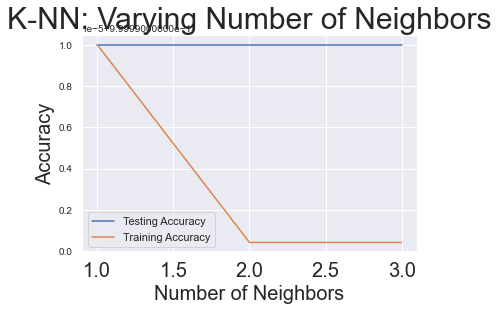

In [1005]:
plt.title('K-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = "Testing Accuracy")
plt.plot(neighbors, train_accuracy, label = "Training Accuracy")
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Other Machine Learning attempted ------------------------------

In [70]:
# Standard Scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
X_train[:5]

array([[-2.08459291e+00,  1.37377857e+00, -4.18850251e-01,
        -1.20319258e+00, -1.17209772e+00, -5.09809359e-01,
        -3.14993488e-01,  1.73232513e+00, -1.37028928e+00,
        -1.03960002e+00, -6.04602090e-01, -2.26450150e+00,
        -1.00261120e+00, -1.04817420e+00, -1.26641879e+00,
        -1.30983375e+00, -1.11560092e+00, -9.64999474e-01,
        -2.63500705e-01, -5.94806492e-01, -9.95932152e-02,
         2.96519129e-01,  7.87211985e-01, -3.05766517e-01,
        -3.48313039e-01, -9.64379804e-02, -4.00911377e-01,
        -7.52377557e-02, -3.72157500e-01, -8.01546064e-02,
        -2.44206340e-01, -1.21189034e-01, -2.16735624e-01,
        -1.07293087e-01, -5.56304960e-02, -3.07327873e-02,
        -4.37664720e-02, -1.96417744e-02, -2.40849554e-01,
        -1.43023314e-01, -5.70955619e-02, -3.67153148e-01,
        -1.56264315e-01, -3.38653695e-01, -6.81859398e-02,
        -2.21302698e-01, -7.69827363e-02, -1.06901170e-01,
        -6.53970895e-02, -7.81603357e-02, -6.59641253e-0

### Random Forest ----------------------------------------------------------------------

In [113]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [73]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52163
           1       1.00      1.00      1.00        69

    accuracy                           1.00     52232
   macro avg       1.00      1.00      1.00     52232
weighted avg       1.00      1.00      1.00     52232



In [ ]:
print(confusion_matrix(y_test, y_pred))

In [74]:
# Counting values in the training data
# to see how many of each are in use.
from collections import Counter
Counter(y_train)


Counter({0: 121712, 1: 160})

In [75]:
Counter(y_test)

Counter({0: 52163, 1: 69})

### Logistic Regression -----------------------------------------------------------------

In [108]:
#instantiate the model
logistic_regression = LogisticRegression()


In [109]:

#fit the model using the training data
logistic_regression.fit(X_train,y_train)


LogisticRegression()

In [110]:
#use model to make predictions on test data
y_pred = logistic_regression.predict(X_test)
Counter(y_pred)

Counter({0: 52163, 1: 69})

In [111]:
#print classification report for model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52163
           1       1.00      1.00      1.00        69

    accuracy                           1.00     52232
   macro avg       1.00      1.00      1.00     52232
weighted avg       1.00      1.00      1.00     52232



In [80]:
print(confusion_matrix(y_test, y_pred))

[[52163     0]
 [    0    69]]


### SVM Classifier ---------------------------------------------------

In [100]:
# Create arrays for the Feature and the Target variable
# Delete Unneeded columns
y = bird_df3['Injured']
X = bird_df3.drop(['Injuries'], axis=1)
#X = bird_df3.drop(['Strike_', 'Injury_bin', 'Injuries'], axis=1)

In [101]:
# split into training and test set
# stratify to help with the imbalance of splitting the data
# 174000 rows vs 229 rows indicating injuries
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state = 42, stratify=y)

In [102]:
# Standard Scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [103]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

In [104]:
print(classification_report(y_test, clf_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52163
           1       1.00      1.00      1.00        69

    accuracy                           1.00     52232
   macro avg       1.00      1.00      1.00     52232
weighted avg       1.00      1.00      1.00     52232



In [105]:
print(confusion_matrix(y_test, clf_pred))

[[52163     0]
 [    0    69]]
